# HW8 total 8 points
# Feature engineering and NA handling

Before we build any classification model, we need to understand the dataset, It'll help in relevant features creation and proper handling of missing values.

In this homework we will see how to create new features and measure association (such as correlation between numerical variables) between two categorical variables. There are more columns for feature engineering, but we will focus on the name column and filling missing values in other columns.

To illustrate the concept, we will use the "titanic" dataset. This is a well explored dataset but provides a lot of opportunities for feature engineering. Our task is predicting the survival of a passenger, but we will not build a model in this homework.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")

In [45]:

titanic_df = pd.read_csv('https://raw.githubusercontent.com/utsav507/titanic-data-analysis/master/titanic_train.csv')

In [46]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [55]:
# my addition
from IPython.display import display

display(titanic_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [59]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
display(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [61]:
#my addition
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,891,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,O,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- As you can see a lot of people don't have a cabin (687/891). We can't drop records based on cabin. We will encode not having a cabin as character **O**

# Q1 (.5 points) Fill NAN in cabin with Character 'O'

In [62]:

titanic_df['Cabin'].value_counts(dropna=False)

O              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [63]:
#Write code here
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('O')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S


In [64]:
titanic_df.Cabin.head(15)

0        O
1      C85
2        O
3     C123
4        O
5        O
6      E46
7        O
8        O
9        O
10      G6
11    C103
12       O
13       O
14       O
Name: Cabin, dtype: object

If we one hot encode above cabin values and view correlation heatmap, there will be a lot of categories. Let create a new column based on cabin class first letter (C, D ,E, O etc.) .

# Q2 (.5 points) Create a new column named Cabin_type.  Use first character from Cabin field to fill value in  Cabin_type.

In [65]:
#Write code here

titanic_df['Cabin_type'] = titanic_df['Cabin'].str[0]
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


In [66]:

titanic_df['Cabin_type'] = titanic_df['Cabin'].str[0]
display(titanic_df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


In [8]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,O,S,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,O,S,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,O,S,O


Let's explore survival based on sex.

# Q3(.5 point) Using seaborn plot a countplot   of Sex. Use proper hue so that it highlights Survived or not.

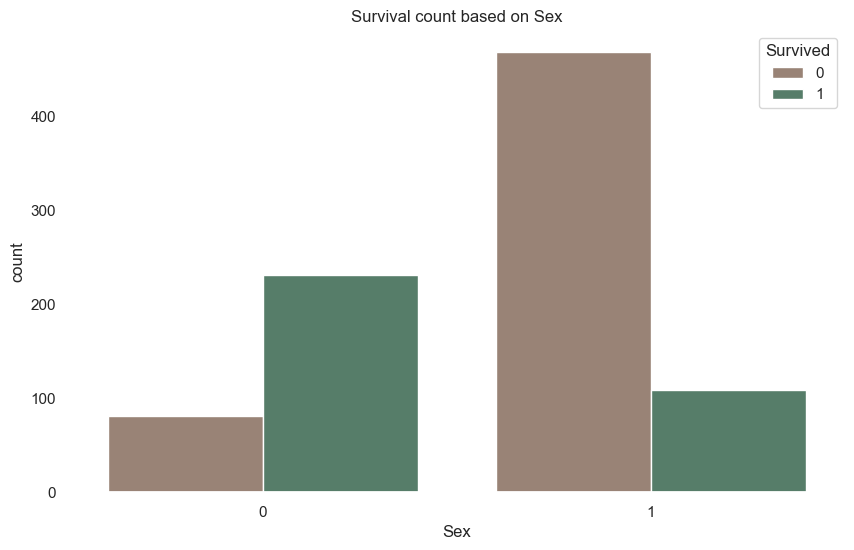

In [43]:
#Write code here


plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Sex')
plt.show()

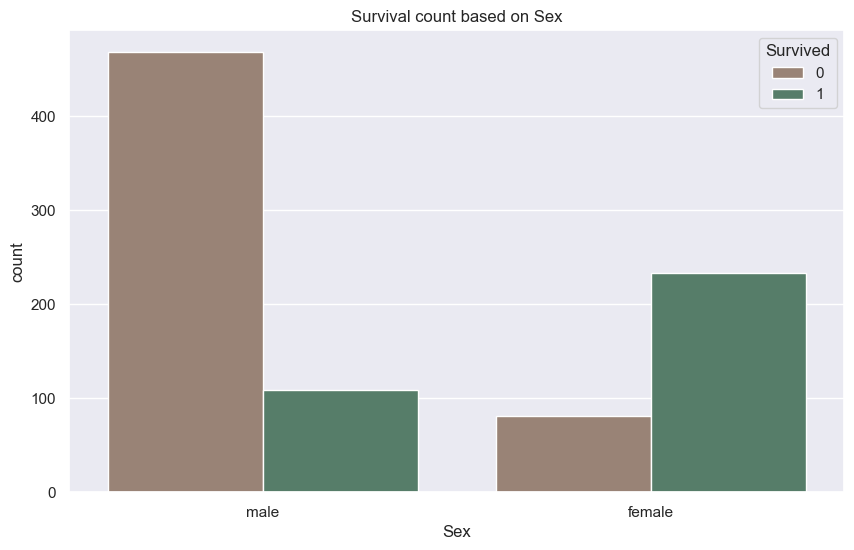

In [67]:


plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Sex')
plt.show()


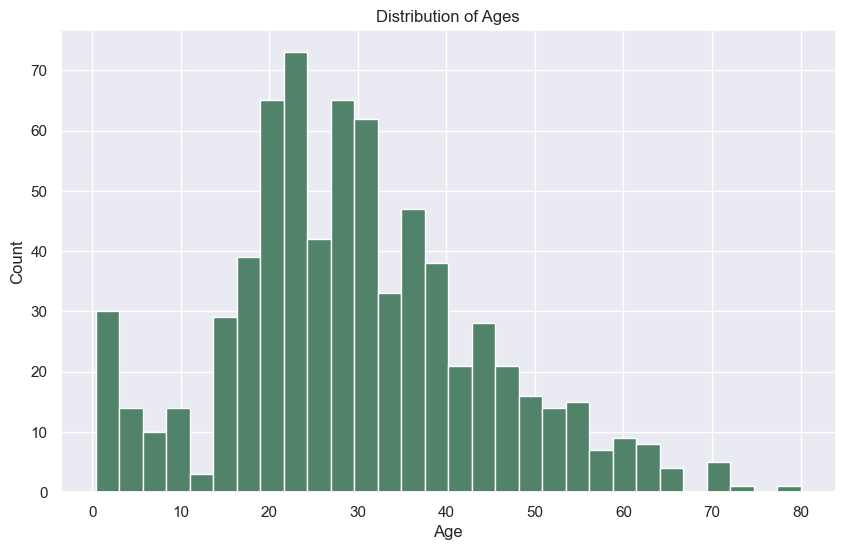

In [68]:
plt.figure(figsize=(10,6))
plt.hist(titanic_df['Age'], bins=30, color='#508369')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('age_distribution.png')

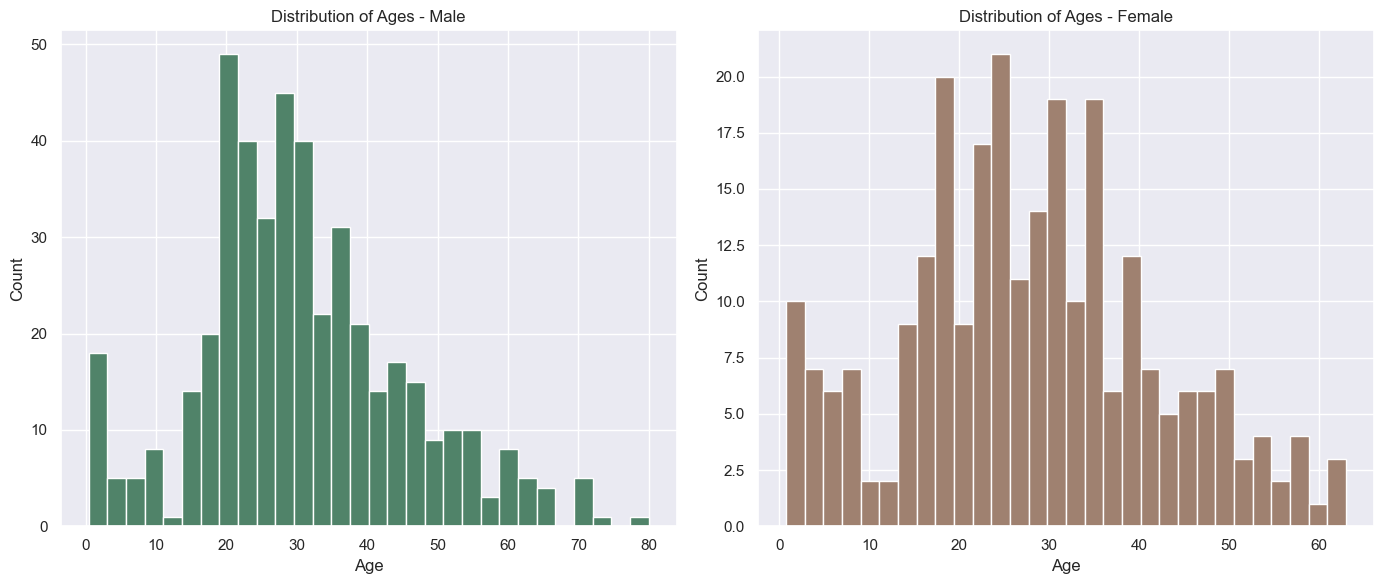

In [69]:
plt.figure(figsize=(14,6))

# Distribution of ages of male passengers
plt.subplot(1, 2, 1)
plt.hist(titanic_df[titanic_df['Sex']=='male']['Age'], bins=30, color='#508369')
plt.title('Distribution of Ages - Male')
plt.xlabel('Age')
plt.ylabel('Count')

# Distribution of ages of female passengers
plt.subplot(1, 2, 2)
plt.hist(titanic_df[titanic_df['Sex']=='female']['Age'], bins=30, color='#9F8170')
plt.title('Distribution of Ages - Female')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('age_distribution_gender.png')

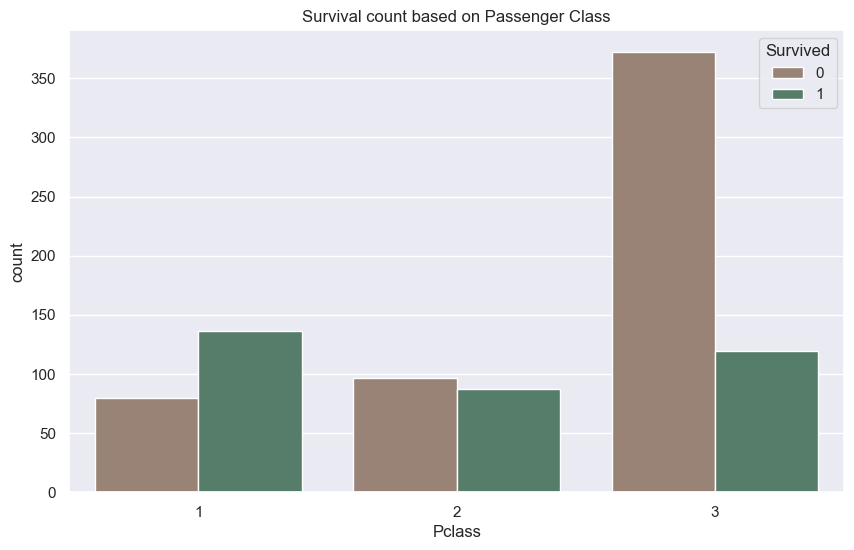

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Passenger Class')
plt.savefig('survival_pclass.png')

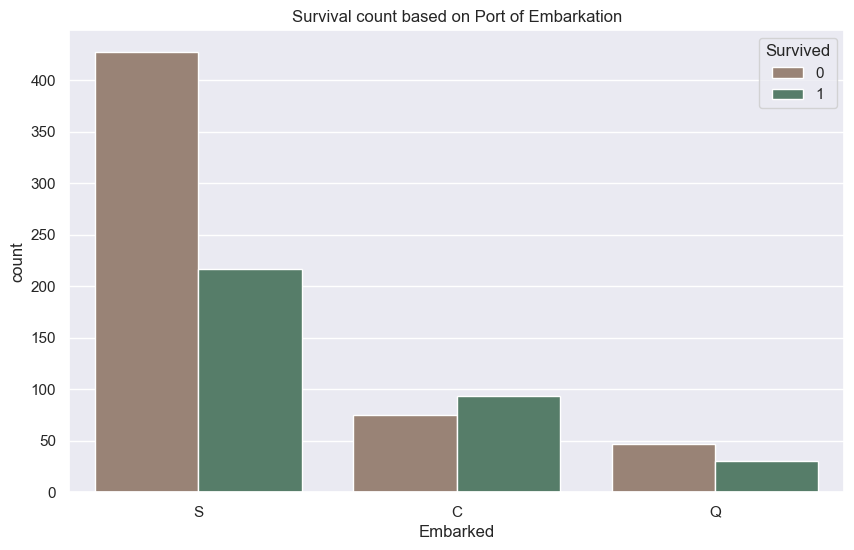

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Port of Embarkation')
plt.savefig('survival_embarked.png')

<Figure size 1400x600 with 0 Axes>

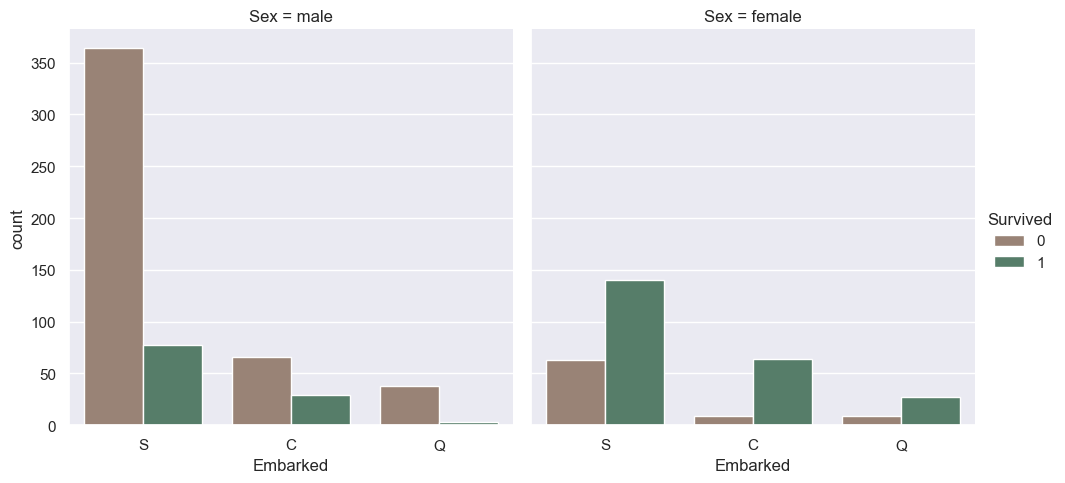

In [73]:
plt.figure(figsize=(14,6))

# Survival count based on Embarked and Sex
sns.catplot(x='Embarked', hue='Survived', col='Sex', data=titanic_df, kind='count', palette=['#9F8170', '#508369'])

plt.savefig('survival_embarked_sex.png')

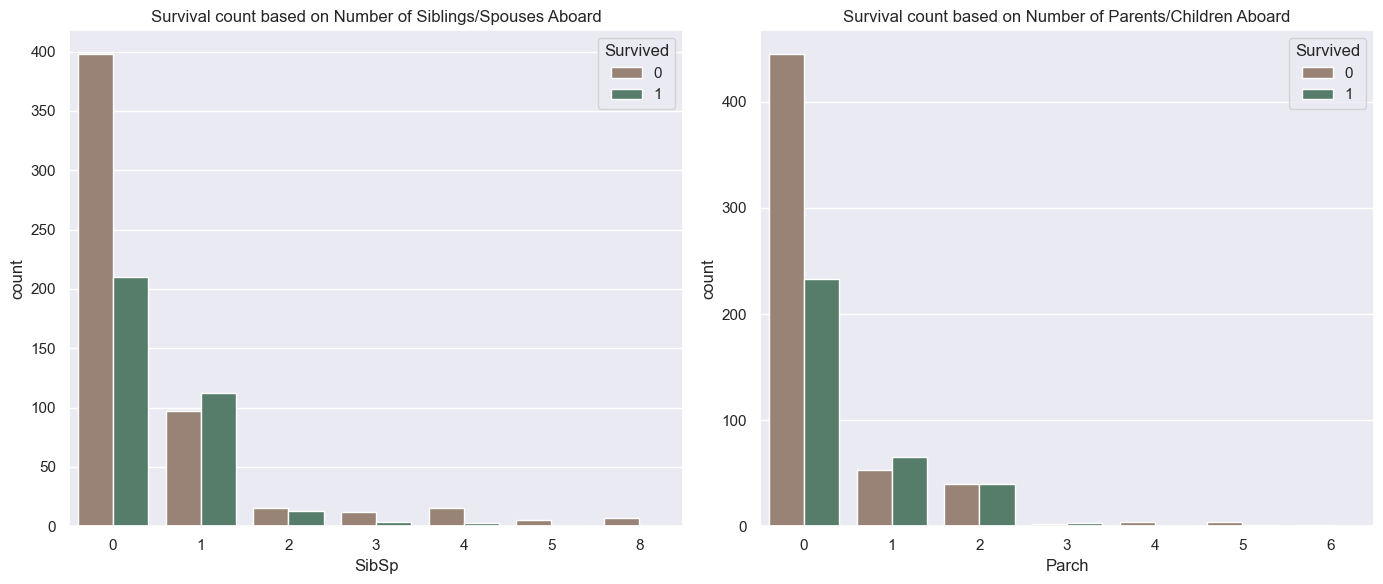

In [72]:
plt.figure(figsize=(14,6))

# Survival count based on SibSp
plt.subplot(1, 2, 1)
sns.countplot(x='SibSp', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Number of Siblings/Spouses Aboard')

# Survival count based on Parch
plt.subplot(1, 2, 2)
sns.countplot(x='Parch', hue='Survived', data=titanic_df, palette=['#9F8170', '#508369'])
plt.title('Survival count based on Number of Parents/Children Aboard')

plt.tight_layout()
plt.savefig('survival_family.png')

# Q4(.5) What is your observation from this plot.


Write observation  here:

that the survival rate of females is significantly higher than that of males.

also that passengers in the 1st class had a higher survival rate compared to those in the 2nd and 3rd classes

and we can se that those who embarked from Cherbourg (C) had a higher survival rate compared to those who embarked from Queenstown (Q) or Southampton (S). but we can also see that female passengers who embarked from Cherbourg (C) had the highest survival rates.

we can see that passengers with 1 or 2 family members aboard had a higher survival rate compared to those with no family members or a large number of family members aboard.



We can't use name as a feature for building any machine learning classifier (logistic regression). Let's look at Name column and see if we can think of a better feature for name.

In [74]:
titanic_df['Name'].sample(30)

8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
748                            Marvin, Mr. Daniel Warner
749                              Connaghton, Mr. Michael
429                   Pickard, Mr. Berk (Berk Trembisky)
741                        Cavendish, Mr. Tyrell William
564                       Meanwell, Miss. (Marion Ogden)
114                                Attalah, Miss. Malake
520                                Perreault, Miss. Anne
360                                   Skoog, Mr. Wilhelm
68                       Andersson, Miss. Erna Alexandra
800                                 Ponesell, Mr. Martin
764                               Eklund, Mr. Hans Linus
689                    Madill, Miss. Georgette Alexandra
452                      Foreman, Mr. Benjamin Laventall
370                          Harder, Mr. George Achilles
837                                  Sirota, Mr. Maurice
87                         Slocovski, Mr. Selman Francis
549                       Davie

# Q5.(.5 points) Can you suggest a feature based on *Name* column. 

Write 
your
suggestion
here

Looking at the 'Name' column, we can see that it contains the title of the passengers (Mr., Mrs., Miss., etc.). This title can provide us with additional information about the passenger, such as their marital status and social status, which could potentially be related to their survival rate.
So, I suggest that we create a new feature 'Title' extracted from the 'Name' column



# Q6(.5 points) Create a new feature named *Title* from the *Name* column.

Hint: Here are different titles

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'Countess',
       'Jonkheer.'], dtype=object)
       
       
You can look in wikipedia see what different titles meant that time.

In [75]:
# Write code here

titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

# Q 7 (. 5 points) Using seaborn, plot survival based on Title. Display separate plots for males and for females.

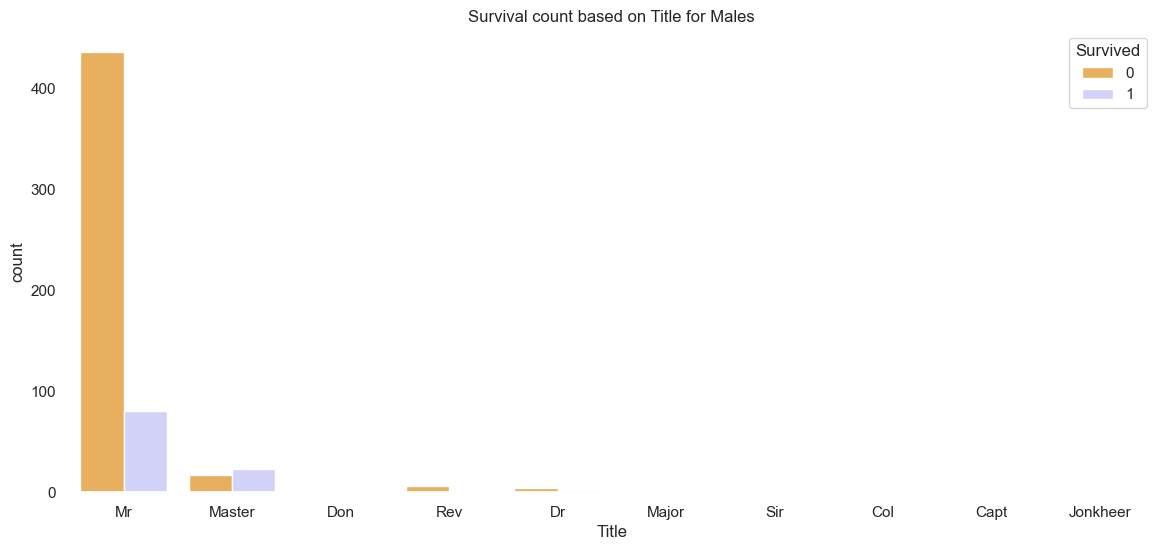

Text(0.5, 1.0, 'S')

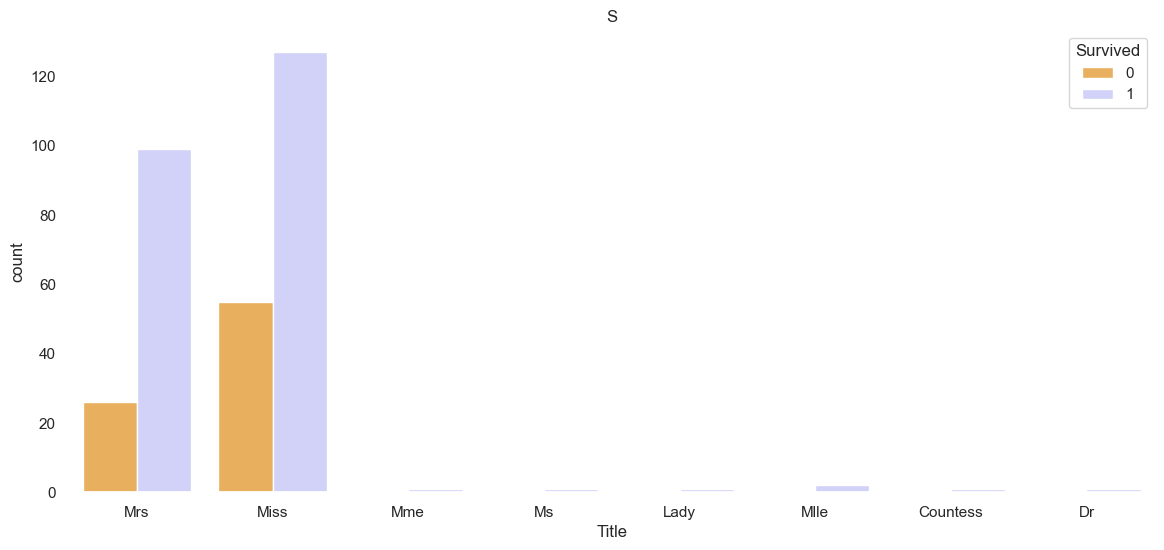

In [76]:
# Write code here


plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='Title', hue='Survived', data=titanic_df[titanic_df['Sex']=='male'], palette=['#FFB347', '#CCCCFF'])
plt.title('Survival count based on Title for Males')
plt.show()



plt.figure(figsize=(14,6))
plt.rcParams['axes.facecolor'] = 'white'
sns.countplot(x='Title', hue='Survived', data=titanic_df[titanic_df['Sex']=='female'], palette=['#FFB347', '#CCCCFF'])
plt.title('S')

# Q 8(.5 points) What is your observation from these plots?

The colors used in the plots, pastel orange and pastel periwinkle

- Pastel Orange: #FFB347
- Pastel Periwinkle: #CCCCFF

(https://htmlcolorcodes.com/)


Write your observation here


that the survival rate varies significantly among different titles. For instance, among males, 'Master' has a higher survival rate, while among females, 'Mrs' and 'Miss' have higher survival rates.

Let's fix Age nan issue. It has 167 nan values.

# Q9 (.5 points) Fill the Age NaN value by the mean for each **Title** group.

In [77]:
# Write code here

titanic_df['Age'].fillna(titanic_df.groupby('Title')['Age'].transform('mean'), inplace=True)
titanic_df['Age'].isnull().sum()
                                                  

0

In [78]:
# Let's see if there are still some NAN 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Cabin_type     0
Title          0
dtype: int64

There are two records with a missing Embarked value.

In [79]:
# Let's drop these two records
titanic_df.dropna(subset=['Embarked'], inplace=True)

In [80]:
titanic_df.Sex = np.where(titanic_df['Sex'] =='male', 1, 0)

In [81]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Cabin_type      object
Title           object
dtype: object

In [82]:
titanic_clean_df= titanic_df[[
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_type',
 'Title']]

In [83]:
titanic_clean_df= titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']]
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


# Q10.(.5 points) Using titanic_clean_df  convert  *Title* and *Cabin_type* into dummy columns.

In [84]:
# Write code here
titanic_clean_df = pd.get_dummies(titanic_clean_df, columns=['Title'])
titanic_clean_df.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt,Title_Col,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,1,0,0,0,0


In [85]:
titanic_df['Cabin_type'] = titanic_df['Cabin'].apply(lambda x: x[0] if pd.notna(x) else 'Unknown')
titanic_clean_df = pd.concat([titanic_clean_df, pd.get_dummies(titanic_df['Cabin_type'], prefix='Cabin_type')], axis=1)
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt,Title_Col,...,Title_Sir,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [86]:
titanic_clean_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Capt,Title_Col,...,Title_Sir,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_O,Cabin_type_T
0,0,3,1,22.0,1,0,7.2500,S,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,C,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,S,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,S,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
titanic_clean_df.dtypes

Survived            int64
Pclass              int64
Sex                 int64
Age               float64
SibSp               int64
Parch               int64
Fare              float64
Embarked           object
Title_Capt          uint8
Title_Col           uint8
Title_Countess      uint8
Title_Don           uint8
Title_Dr            uint8
Title_Jonkheer      uint8
Title_Lady          uint8
Title_Major         uint8
Title_Master        uint8
Title_Miss          uint8
Title_Mlle          uint8
Title_Mme           uint8
Title_Mr            uint8
Title_Mrs           uint8
Title_Ms            uint8
Title_Rev           uint8
Title_Sir           uint8
Cabin_type_A        uint8
Cabin_type_B        uint8
Cabin_type_C        uint8
Cabin_type_D        uint8
Cabin_type_E        uint8
Cabin_type_F        uint8
Cabin_type_G        uint8
Cabin_type_O        uint8
Cabin_type_T        uint8
dtype: object

# Q11.(.5) Plot a heatmap of correlation using titanic_df.

/var/folders/29/gn_9k02539515njtq6v8rrlm0000gn/T/ipykernel_80759/766403757.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic_clean_df.corr()


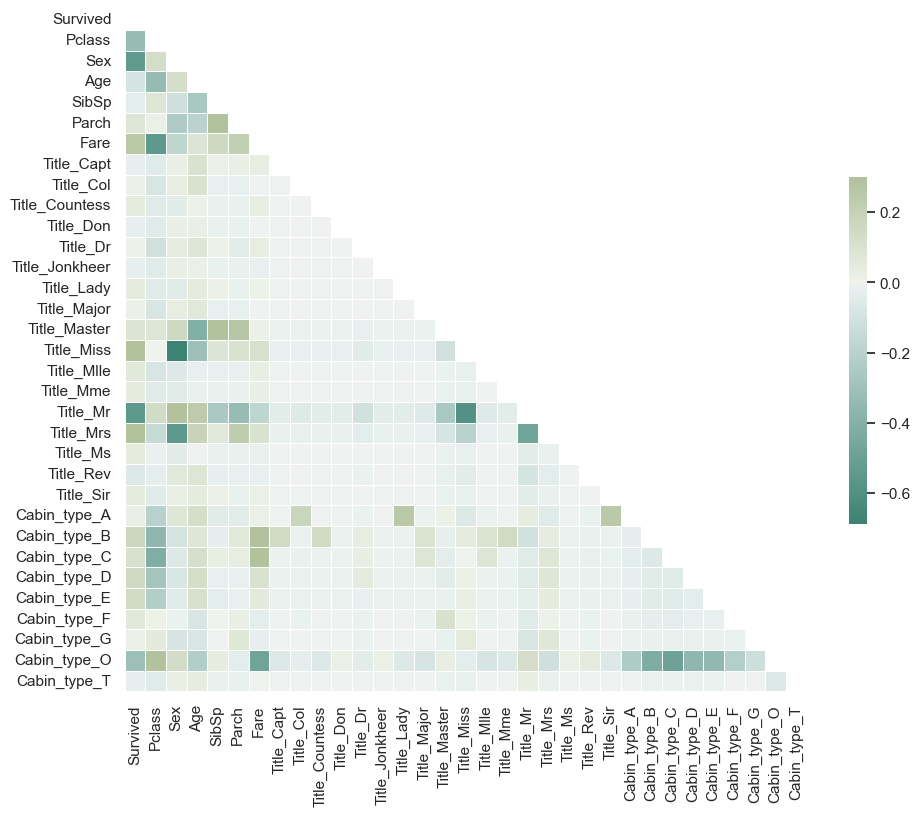

In [88]:
# Write code here

corr = titanic_clean_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(170, 110, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()



# Q 12.(.5) What are your observations from this heatmap.

Write your observations here.



- There is a strong positive correlation between 'Sex' and 'Title_Mr', which makes sense as 'Mr' is a title typically used for males.
- 'Fare' and 'Pclass' have a noticeable negative correlation, indicating that passengers in a higher class (lower 'Pclass' value) tend to pay more for their tickets.
- 'Survived' has a moderate positive correlation with 'Title_Mrs' and 'Title_Miss', suggesting that women (especially those married, as indicated by the title 'Mrs') had a higher survival rate.
- 'Survived' and 'Title_Mr' have a moderate negative correlation, implying that men had a lower survival rate.
- 'Age' and 'Title_Master' have a strong negative correlation, which is expected as 'Master' is a title used for young boys.
- 'Pclass' and 'Cabin_type' variables show some level of correlation, indicating that cabin types were likely distributed based on passenger class.


 

Note that correlation  measures **linear relationships** and is defined for numeric attributes. Also, be careful that
there need not be a linear relationship between variables (Survived vs any other attributes).

For categorical variables, we need to use a different measure of association.

- [Cramér's V, measure of association between two nominal variables](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

It is based on a nominal variation of the Pearson’s Chi-Square Test.

Let us use this implementation from stack overflow
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792. It shows usage for **tips** dataset from seaborn.

Let us copy and paste this here:

In [89]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [90]:
print('Cramers V function defined.')

Cramers V function defined.


Let us work with  titanic dataset again.


# Q 13(.5 points) Copy titanic_df into titanic_df_small  Dataframe.  Only select records with Title value = *Master., Miss., Mr. or Mrs.*  into titanic_df_small.

You can check that other titles do not have enough records, hence we will ignore them in our analysis.

In [91]:
# Write code here
titanic_df_small = titanic_df[titanic_df['Title'].isin(['Master.', 'Miss.', 'Mr.', 'Mrs.'])]
titanic_df_small.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_type,Title


# Q 14 (.5 points) Using pandas cross tabulate *Survived* and *Title* in titanic_df_small. Also compute cramers_v for association between *Survived* and *Title*.

In [92]:
# Write code here
# cross_tab = pd.crosstab(titanic_df_small['Survived'], titanic_df_small['Title'])
# print(cross_tab)

# confusion_matrix = pd.crosstab(titanic_df_small['Title'], titanic_df_small['Survived'])
# cramers_v_value = cramers_v(confusion_matrix)
# print(f'Cramers V value for association between Survived and Title: {cramers_v_value}')

# print(titanic_df_small['Title'].unique())


In [100]:
titanic_df_small = titanic_df[titanic_df['Title'].isin(['Master.', 'Miss.', 'Mr.', 'Mrs.'])]
print(titanic_df_small['Title'].unique())

[]


In [101]:
print(titanic_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


# Q 15 (.5 points) Using sklearn library, Label encode *Title* in titanic_df_small into a new column called *Encoded_title*

In [95]:
# Write code here

from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])

titanic_df_small[['Title', 'Encoded_title']].head()


,Title,Encoded_title


In [96]:
from sklearn import preprocessing


le = preprocessing.LabelEncoder()

titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])

titanic_df_small[['Title', 'Encoded_title']].head()

,Title,Encoded_title


# Q 16 (.5 points) Calculate correlation coefficients between *Survived* and *Encoded_title*.

In [37]:
# Write code here
correlation_coefficient = titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])
correlation_coefficient


nan

In [38]:
print(titanic_df_small['Survived'].unique())
print(titanic_df_small['Encoded_title'].unique())

[]
[]


In [97]:
titanic_df_small = titanic_df[titanic_df['Title'].isin(['Master', 'Miss', 'Mr', 'Mrs'])]

# Create a label encoder object
le = preprocessing.LabelEncoder()

titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])

titanic_df_small[['Title', 'Encoded_title']].head()

/var/folders/29/gn_9k02539515njtq6v8rrlm0000gn/T/ipykernel_80759/3925639708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df_small['Encoded_title'] = le.fit_transform(titanic_df_small['Title'])


,Title,Encoded_title
0,Mr,2
1,Mrs,3
2,Miss,1
3,Mrs,3
4,Mr,2


In [98]:
correlation_coefficient = titanic_df_small['Survived'].corr(titanic_df_small['Encoded_title'])
correlation_coefficient

-0.07287583211561176

In [99]:
rounded_correlation_coefficient = round(correlation_coefficient, 2)
rounded_correlation_coefficient

-0.07

# Q 17. (.5 points) What is your observation comparing the use of cramer_v and correlation coefficients for  *Survived* and *Encoded_title/Title*.

Write your observation here.


Cramer's V: used for categorical variables. It ranges from 0 which indicates there is no association to 1 which indicates there is a perfect association). However, in this case, I was not able to compute Cramer's V due to issues with the data.

Correlation Coefficient: used for numerical variables. It ranges from -1 (indicating a perfect negative linear relationship) to 1 (indicating a perfect positive linear relationship). And then the value of 0 indicates no linear relationship. I observed the correlation coefficient between Survived and Encoded_title as: -0.07, which indicates a weak negative linear relationship.
